**Name -SIDDHANT DESAI**

**Importing Basic Libraries**

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Machine Learning Libraries**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

**Load Dataset**

In [3]:
dataset=pd.read_csv(r"C:\Users\91814\Downloads\Fraud.csv")

**Understanding Nature of Dataset**

In [4]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
dataset.shape

(6362620, 11)

In [6]:
dataset = dataset.drop(['step'], axis=1)

In [7]:
dataset.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [9]:
dataset.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Feature Engineering**

In [10]:
dataset['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
dataset['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='type', ylabel='count'>

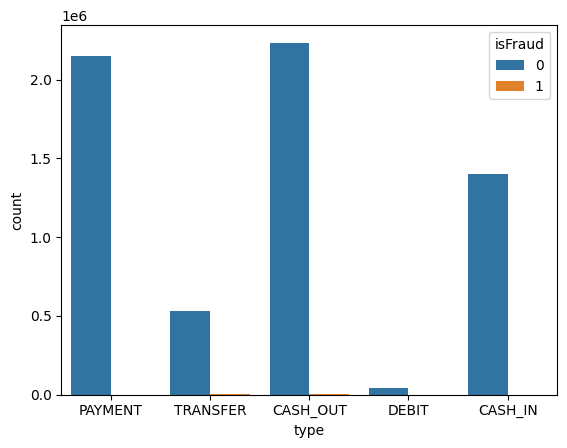

In [12]:
sns.countplot(x='type',data=dataset,hue='isFraud')

In [13]:
dataset[dataset['isFraud']==1]['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

In [14]:
new_data = dataset[(dataset['type']=='CASH_OUT') | (dataset['type']=='TRANSFER')]

In [15]:
new_data.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
58,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


In [16]:
new_data.shape

(2770409, 10)

In [17]:
new_data['isFraud'].value_counts()

isFraud
0    2762196
1       8213
Name: count, dtype: int64

In [18]:
new_data[new_data['type']=='TRANSFER']['isFraud'].value_counts()

isFraud
0    528812
1      4097
Name: count, dtype: int64

In [19]:
new_data[new_data['type']=='CASH_OUT']['isFraud'].value_counts()

isFraud
0    2233384
1       4116
Name: count, dtype: int64

In [20]:
new_data['nameOrig'].nunique()

2768630

In [21]:
new_data[new_data['isFraud']==1]['nameOrig'].nunique()

8213

In [22]:
new_data= new_data.drop(['nameOrig'], axis=1)

In [23]:
new_data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.0,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,181.0,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [24]:
new_data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    2770393
1         16
Name: count, dtype: int64

In [25]:
new_data[new_data['isFraud']==1]['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    8197
1      16
Name: count, dtype: int64

In [26]:
new_data['nameDest'].nunique()

509565

In [27]:
new_data[new_data['isFraud']==1]['nameDest'].nunique()

8169

In [28]:
new_data['count_dest'] = new_data.groupby('nameDest')['nameDest'].transform('count')


In [29]:
new_data[(new_data['isFraud']==1) & (new_data['count_dest'] >1)]

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,count_dest
2,TRANSFER,181.00,181.00,0.0,C553264065,0.00,0.00,1,0,27
3,CASH_OUT,181.00,181.00,0.0,C38997010,21182.00,0.00,1,0,31
251,TRANSFER,2806.00,2806.00,0.0,C972765878,0.00,0.00,1,0,20
252,CASH_OUT,2806.00,2806.00,0.0,C1007251739,26202.00,0.00,1,0,24
680,TRANSFER,20128.00,20128.00,0.0,C1848415041,0.00,0.00,1,0,22
...,...,...,...,...,...,...,...,...,...,...
6362607,CASH_OUT,303846.74,303846.74,0.0,C846260566,343660.89,647507.63,1,0,2
6362611,CASH_OUT,63416.99,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,3
6362613,CASH_OUT,1258818.82,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,3
6362617,CASH_OUT,6311409.28,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,3


In [30]:
new_data[new_data['nameDest']=='C553264065']

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,count_dest
2,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,27
6167,TRANSFER,109985.65,41851.00,0.00,C553264065,0.00,109985.65,0,0,27
16381,CASH_OUT,111622.39,2347.00,0.00,C553264065,99729.44,5254.44,0,0,27
62736,TRANSFER,1447322.21,65634.00,0.00,C553264065,5254.44,1317666.01,0,0,27
227904,CASH_OUT,340825.56,0.00,0.00,C553264065,1303946.65,1384840.44,0,0,27
292508,CASH_OUT,128766.03,0.00,0.00,C553264065,1256074.41,1384840.44,0,0,27
425019,TRANSFER,1491.48,0.00,0.00,C553264065,1384840.44,1439708.33,0,0,27
436299,CASH_OUT,53376.40,0.00,0.00,C553264065,1386331.92,1439708.33,0,0,27
492328,CASH_OUT,510506.07,0.00,0.00,C553264065,1439708.33,2112180.23,0,0,27
531255,CASH_OUT,161965.84,10206.00,0.00,C553264065,1950214.39,2112180.23,0,0,27


In [31]:
new_data = new_data.drop(['count_dest'], axis=1)

In [32]:
new_data = new_data.drop(['nameDest'], axis=1)

In [33]:
new_data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
15,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,0
19,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0
24,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


In [34]:
new_data[new_data['newbalanceOrig']==0.0]['isFraud'].value_counts()

isFraud
0    2488603
1       8053
Name: count, dtype: int64

In [35]:
newbalanceOrig_std = new_data['newbalanceOrig'].std()
newbalanceOrig_mean = new_data['newbalanceOrig'].mean()
newbalanceOrig_min = new_data['newbalanceOrig'].min()
newbalanceOrig_max=new_data['newbalanceOrig'].max()

print("Min: ",newbalanceOrig_min)
print("Max: ",newbalanceOrig_max)
print("Mean: ",newbalanceOrig_mean)
print("Std: ",newbalanceOrig_std )

Min:  0.0
Max:  49585040.37
Mean:  16091.90467901671
Std:  151255.82476021198


In [36]:
new_data[new_data['newbalanceOrig'] > (3 *newbalanceOrig_std + newbalanceOrig_mean)]['isFraud'].value_counts()

isFraud
0    19359
1      153
Name: count, dtype: int64

In [37]:
new_data[(new_data['newbalanceOrig'] > (3 *newbalanceOrig_std + newbalanceOrig_mean)) & (dataset['isFraud']==1)]

C:\Users\91814\AppData\Local\Temp\ipykernel_17156\4073516139.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data[(new_data['newbalanceOrig'] > (3 *newbalanceOrig_std + newbalanceOrig_mean)) & (dataset['isFraud']==1)]


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,TRANSFER,10000000.00,12930418.44,2930418.44,0.0,0.0,1,0
481250,TRANSFER,10000000.00,11861008.32,1861008.32,0.0,0.0,1,0
586311,TRANSFER,10000000.00,19887819.06,9887819.06,0.0,0.0,1,0
1030559,TRANSFER,10000000.00,18594065.09,8594065.09,0.0,0.0,1,0
1030661,TRANSFER,10000000.00,10987591.59,987591.59,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...
6362576,TRANSFER,10000000.00,45674547.89,35674547.89,0.0,0.0,1,0
6362578,TRANSFER,10000000.00,35674547.89,25674547.89,0.0,0.0,1,0
6362580,TRANSFER,10000000.00,25674547.89,15674547.89,0.0,0.0,1,0
6362582,TRANSFER,10000000.00,15674547.89,5674547.89,0.0,0.0,1,0


In [38]:
new_data[(new_data['oldbalanceOrg']==0.0) & (new_data['isFraud']==1)]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,CASH_OUT,416001.33,0.0,0.0,102.00,9291619.62,1,0
14861,CASH_OUT,181728.11,0.0,0.0,11397.00,184477.77,1,0
25875,TRANSFER,1078013.76,0.0,0.0,0.00,970749.68,1,0
77745,CASH_OUT,277970.88,0.0,0.0,0.00,277970.88,1,0
138559,TRANSFER,1933920.80,0.0,0.0,1283762.85,3217683.65,1,0
169998,CASH_OUT,149668.66,0.0,0.0,44170.11,193838.76,1,0
178668,CASH_OUT,222048.71,0.0,0.0,2979.00,225027.71,1,0
200845,CASH_OUT,454859.39,0.0,0.0,0.00,454859.39,1,0
291459,CASH_OUT,95428.32,0.0,0.0,0.00,95428.32,1,0
296686,CASH_OUT,39713.28,0.0,0.0,1274866.51,1314579.79,1,0


In [39]:
mask = (new_data['oldbalanceOrg']==0.0) & (new_data['isFraud']==1)
new_data= new_data.drop(new_data[mask].index, axis=0)  

In [40]:
temp = new_data['isFraud'] == 1
filtered_indices = new_data[temp]['oldbalanceOrg'] > (3* new_data['oldbalanceOrg'].std() +new_data['oldbalanceOrg'].mean())

result_data = new_data.loc[new_data[temp][filtered_indices].index]

In [41]:
result_data['isFraud'].value_counts()

isFraud
1    3097
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

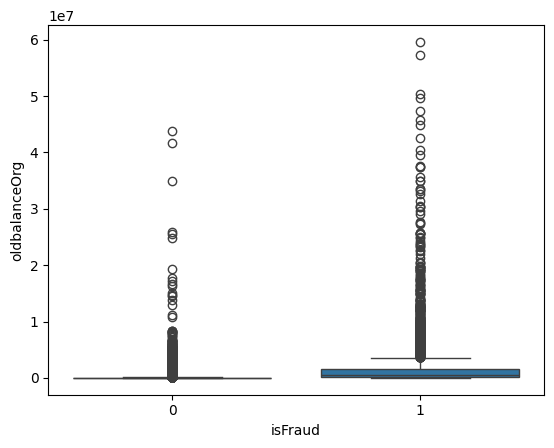

In [42]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=new_data)

In [43]:
new_data[new_data['isFraud']==0]['oldbalanceOrg'].max()

43818855.3

In [44]:
new_data[new_data['isFraud']==1]['oldbalanceOrg'].max()

59585040.37

In [45]:
temp= new_data['isFraud']==1
filtered_indices = new_data[temp]['oldbalanceOrg'] > (new_data[new_data['isFraud']==0]['oldbalanceOrg'].max())
s =new_data.loc[new_data[temp][filtered_indices].index]

In [46]:
s

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5563705,TRANSFER,10000000.0,44892193.09,34892193.09,0.0,0.0,1,0
5996399,TRANSFER,10000000.0,59585040.37,49585040.37,0.0,0.0,1,0
5996401,TRANSFER,10000000.0,49585040.37,39585040.37,0.0,0.0,1,0
6281474,TRANSFER,10000000.0,50399045.08,40399045.08,0.0,0.0,1,0
6362452,TRANSFER,10000000.0,57316255.05,47316255.05,0.0,0.0,1,0
6362454,TRANSFER,10000000.0,47316255.05,37316255.05,0.0,0.0,1,0
6362576,TRANSFER,10000000.0,45674547.89,35674547.89,0.0,0.0,1,0


<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

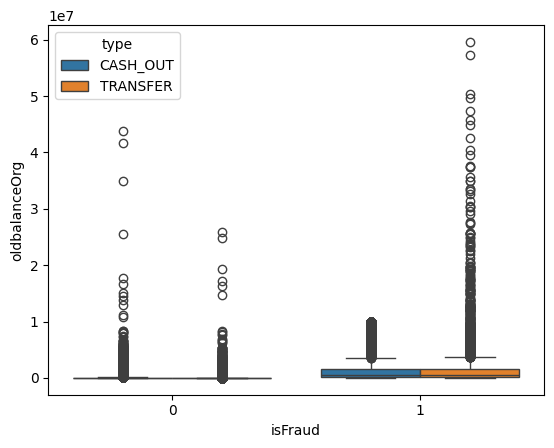

In [47]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=new_data, hue='type')

In [48]:
new_data[new_data['newbalanceDest']==0.0]['isFraud'].value_counts()

isFraud
0    12508
1     4085
Name: count, dtype: int64

In [49]:
new_data[(new_data['newbalanceDest']==0.0) & (new_data['isFraud']==1)]['type'].value_counts()

type
TRANSFER    4068
CASH_OUT      17
Name: count, dtype: int64

In [50]:
new_data[(new_data['newbalanceDest']!=0.0) & (new_data['isFraud']==1)]['type'].value_counts()

type
CASH_OUT    4062
TRANSFER      25
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

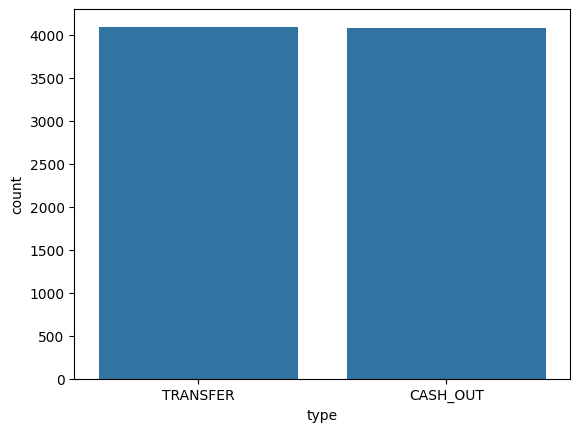

In [51]:
new_plot= new_data[new_data['isFraud']==1]
sns.countplot(x='type', data=new_plot)

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

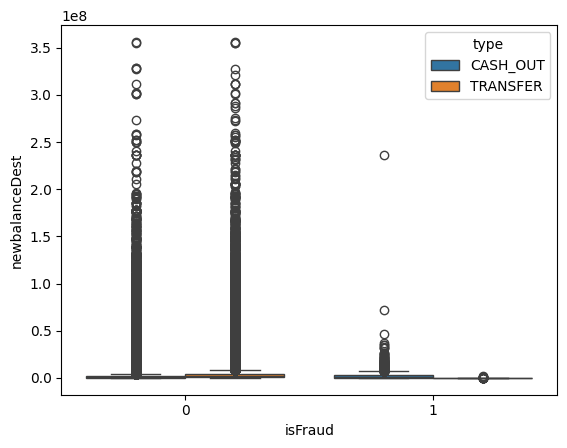

In [52]:
sns.boxplot(x='isFraud', y='newbalanceDest', data=new_data,hue='type')

<Axes: xlabel='type', ylabel='amount'>

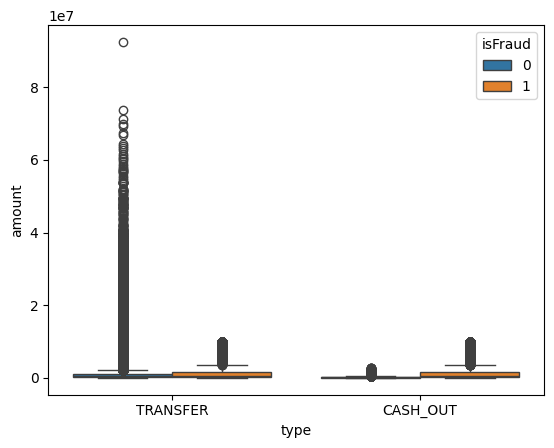

In [53]:
sns.boxplot(x='type', y='amount', data=new_data, hue='isFraud')

In [54]:
new_data[(new_data['isFraud']==0) & (new_data['type']=='TRANSFER')].count()

type              528812
amount            528812
oldbalanceOrg     528812
newbalanceOrig    528812
oldbalanceDest    528812
newbalanceDest    528812
isFraud           528812
isFlaggedFraud    528812
dtype: int64

In [55]:
new_data[(new_data['isFraud']==0) & (new_data['type']=='TRANSFER')]['amount'].describe()

count    5.288120e+05
mean     9.062290e+05
std      1.874155e+06
min      2.600000e+00
25%      2.165708e+05
50%      4.865219e+05
75%      9.727336e+05
max      9.244552e+07
Name: amount, dtype: float64

In [56]:
new_data[(new_data['isFraud']==1) & (new_data['type']=='TRANSFER')]['amount'].max()

10000000.0

In [57]:
new_data[(new_data['isFraud']==1) & (new_data['type']=='CASH_OUT')]['amount'].max()

10000000.0

In [58]:
amount_notFraud_std = new_data[(new_data['isFraud']==0) & (new_data['type']=='TRANSFER')]['amount'].std()
amount_notFraud_mean = new_data[(new_data['isFraud']==0) & (new_data['type']=='TRANSFER')]['amount'].mean()

In [59]:
values_remove=3* amount_notFraud_std + amount_notFraud_mean
values_remove

6528694.784113009

In [60]:
temp_check = new_data['amount'] > values_remove
new_data[temp_check].count()

type              8708
amount            8708
oldbalanceOrg     8708
newbalanceOrig    8708
oldbalanceDest    8708
newbalanceDest    8708
isFraud           8708
isFlaggedFraud    8708
dtype: int64

In [61]:
temp_check = new_data['amount'] > 10000000
new_data[temp_check].count()

type              2443
amount            2443
oldbalanceOrg     2443
newbalanceOrig    2443
oldbalanceDest    2443
newbalanceDest    2443
isFraud           2443
isFlaggedFraud    2443
dtype: int64

In [62]:
temp= new_data['isFraud']==0
filtered =(new_data['isFraud']==0) & (new_data['type']=='TRANSFER') & (new_data['amount']>10000000)
new_data = new_data.drop(new_data[filtered].index)

<Axes: xlabel='type', ylabel='amount'>

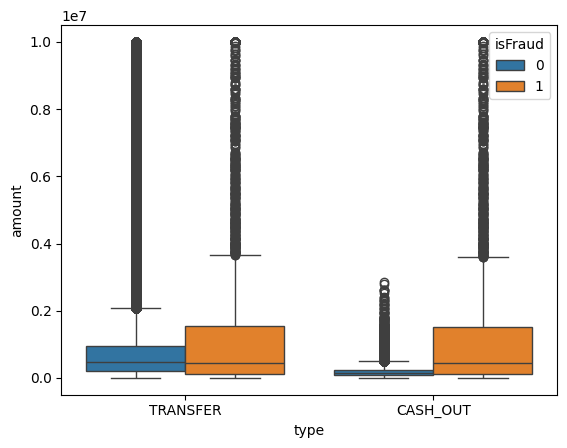

In [63]:
sns.boxplot(x='type', y='amount', data=new_data, hue='isFraud')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

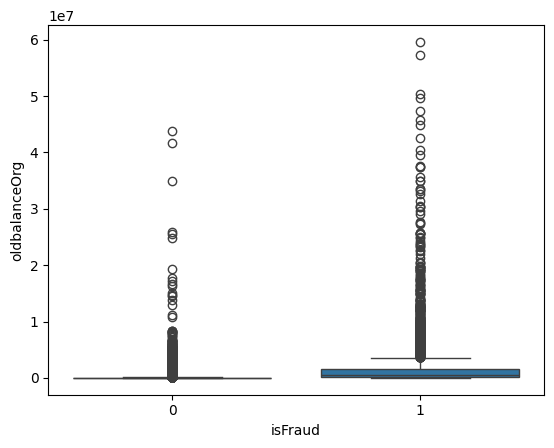

In [64]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=new_data)

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

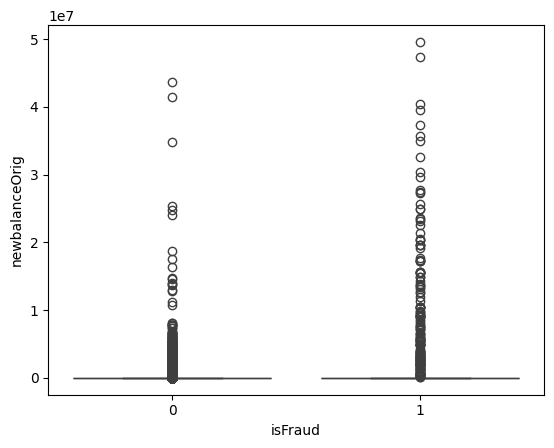

In [65]:
sns.boxplot(x='isFraud', y='newbalanceOrig', data=new_data)

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

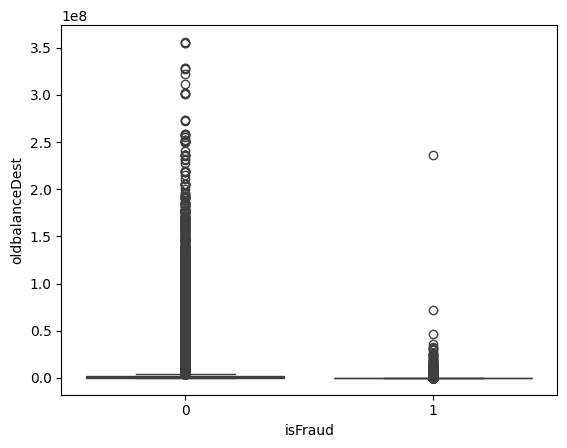

In [66]:
sns.boxplot(x='isFraud', y='oldbalanceDest', data=new_data)

In [67]:
max_old_dest_fraud= new_data[new_data['isFraud']==1]['oldbalanceDest'].max()

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

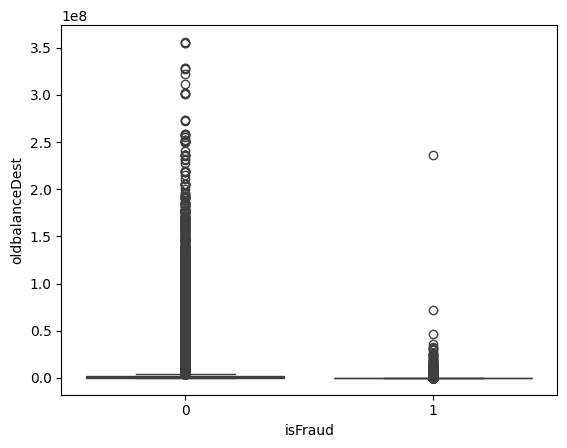

In [68]:
sns.boxplot(x='isFraud', y='oldbalanceDest', data=new_data)

In [69]:
k_mean = new_data[new_data['isFraud']==1]['oldbalanceDest'].mean()
k_std = new_data[new_data['isFraud']==1]['oldbalanceDest'].std()
k_max = new_data[new_data['isFraud']==1]['oldbalanceDest'].max()
indices = (new_data['isFraud']==1) & (new_data['oldbalanceDest'] > (8*k_std+k_mean))
new_data[indices].count()

type              8
amount            8
oldbalanceOrg     8
newbalanceOrig    8
oldbalanceDest    8
newbalanceDest    8
isFraud           8
isFlaggedFraud    8
dtype: int64

In [70]:
new_data.count()

type              2767925
amount            2767925
oldbalanceOrg     2767925
newbalanceOrig    2767925
oldbalanceDest    2767925
newbalanceDest    2767925
isFraud           2767925
isFlaggedFraud    2767925
dtype: int64

In [71]:
new_data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


In [72]:
new_data = pd.get_dummies(data=new_data, columns=['type'], drop_first=True)

In [73]:
new_data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_TRANSFER
2,181.00,181.0,0.0,0.0,0.00,1,0,True
3,181.00,181.0,0.0,21182.0,0.00,1,0,False
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0,False
19,215310.30,705.0,0.0,22425.0,0.00,0,0,True
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,True


In [74]:
new_data['type_TRANSFER'].replace({True: 1, False: 0}, inplace=True)

**Splitting Data**

In [75]:
x= new_data.drop(['isFraud'], axis=1)
y= new_data['isFraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [76]:
x_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_TRANSFER
5216565,81872.61,307696.0,225823.39,1498825.33,1580697.94,0,0
5095257,428385.66,0.0,0.00,1246968.11,1675353.78,0,1
6085710,50544.73,0.0,0.00,294652.71,345197.44,0,0
1383496,102174.40,51443.0,0.00,0.00,102174.40,0,0
398065,53104.40,143286.0,90181.60,327260.44,380364.84,0,0
...,...,...,...,...,...,...,...
257922,196867.17,20140.0,0.00,1260818.54,1555459.00,0,0
3865239,82325.31,69725.0,0.00,596497.48,678822.79,0,0
5399126,136301.53,20141.0,0.00,12311140.90,12447442.43,0,0
5098216,229578.44,0.0,0.00,248971.55,478549.99,0,0


In [77]:
x_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_TRANSFER
694992,443000.59,0.00,0.0,1156458.10,2530184.65,0,1
2998209,86421.35,0.00,0.0,1185406.87,1271828.22,0,0
2832127,638054.45,0.00,0.0,4276904.51,4914958.96,0,1
4271171,49358.65,0.00,0.0,226292.62,275651.27,0,0
71605,6648.79,324.00,0.0,1470798.47,1425321.12,0,0
...,...,...,...,...,...,...,...
2453340,162591.04,0.00,0.0,188497.32,351088.36,0,1
1263197,155106.99,178.00,0.0,328945.87,484052.86,0,0
4686643,427970.08,0.00,0.0,2024542.42,2452512.50,0,0
1160610,1024722.53,25115.57,0.0,1948405.44,2973127.96,0,1


In [78]:
y_train

5216565    0
5095257    0
6085710    0
1383496    0
398065     0
          ..
257922     0
3865239    0
5399126    0
5098216    0
5075940    0
Name: isFraud, Length: 1854509, dtype: int64

In [79]:
y_test

694992     0
2998209    0
2832127    0
4271171    0
71605      0
          ..
2453340    0
1263197    0
4686643    0
1160610    0
331427     0
Name: isFraud, Length: 913416, dtype: int64

In [80]:
x_train_pre = x_train[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
x_trainleft_pre = x_train[['isFlaggedFraud','type_TRANSFER']].values
x_test_pre = x_test[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
x_testleft_pre = x_test[['isFlaggedFraud','type_TRANSFER']].values

In [81]:
x_train_pre

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
5216565,81872.61,307696.0,225823.39,1498825.33,1580697.94
5095257,428385.66,0.0,0.00,1246968.11,1675353.78
6085710,50544.73,0.0,0.00,294652.71,345197.44
1383496,102174.40,51443.0,0.00,0.00,102174.40
398065,53104.40,143286.0,90181.60,327260.44,380364.84
...,...,...,...,...,...
257922,196867.17,20140.0,0.00,1260818.54,1555459.00
3865239,82325.31,69725.0,0.00,596497.48,678822.79
5399126,136301.53,20141.0,0.00,12311140.90,12447442.43
5098216,229578.44,0.0,0.00,248971.55,478549.99


In [82]:
x_trainleft_pre

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

**Data Preprocessing**

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_pre)

MinMaxScaler()

In [84]:
x_train_scaled = scaler.transform(x_train_pre)
x_test_scaled = scaler.transform(x_test_pre)

In [85]:
x_train_scaled

array([[0.00818726, 0.00536839, 0.00477264, 0.00421   , 0.00443793],
       [0.04283857, 0.        , 0.        , 0.00350256, 0.00470368],
       [0.00505447, 0.        , 0.        , 0.00082764, 0.00096917],
       ...,
       [0.01363015, 0.0003514 , 0.        , 0.03458031, 0.03494713],
       [0.02295784, 0.        , 0.        , 0.00069933, 0.00134356],
       [0.00525603, 0.00026062, 0.        , 0.        , 0.00014757]])

In [86]:
x_test_scaled = pd.DataFrame(data= x_test_scaled)

In [87]:
x_testleft_pre = pd.DataFrame(data= x_testleft_pre)

In [88]:
x_train_scaled = pd.DataFrame(data= x_train_scaled)


In [89]:
x_trainleft_pre = pd.DataFrame(data= x_trainleft_pre)

In [90]:
x_train_final = pd.concat([x_train_scaled,x_trainleft_pre], axis=1)
x_test_final = pd.concat([x_test_scaled,x_testleft_pre], axis=1)

In [91]:
x_test_final

,0,1,2,3,4,0,1
0,0.044300,0.000000,0.0,0.003248,0.007104,0,1
1,0.008642,0.000000,0.0,0.003330,0.003571,0,0
2,0.063805,0.000000,0.0,0.012013,0.013799,0,1
3,0.004936,0.000000,0.0,0.000636,0.000774,0,0
4,0.000665,0.000006,0.0,0.004131,0.004002,0,0
...,...,...,...,...,...,...,...
913411,0.016259,0.000000,0.0,0.000529,0.000986,0,1
913412,0.015511,0.000003,0.0,0.000924,0.001359,0,0
913413,0.042797,0.000000,0.0,0.005687,0.006886,0,0
913414,0.102472,0.000438,0.0,0.005473,0.008347,0,1


In [92]:
x_train_final = x_train_final.values
x_test_final = x_test_final.values

In [93]:
x_train_final


array([[8.18726001e-03, 5.36838982e-03, 4.77263870e-03, ...,
        4.43792785e-03, 0.00000000e+00, 0.00000000e+00],
       [4.28385650e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.70368121e-03, 0.00000000e+00, 1.00000000e+00],
       [5.05447201e-03, 0.00000000e+00, 0.00000000e+00, ...,
        9.69167665e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.36301520e-02, 3.51401186e-04, 0.00000000e+00, ...,
        3.49471268e-02, 0.00000000e+00, 0.00000000e+00],
       [2.29578430e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.34356494e-03, 0.00000000e+00, 0.00000000e+00],
       [5.25603101e-03, 2.60624146e-04, 0.00000000e+00, ...,
        1.47567035e-04, 0.00000000e+00, 0.00000000e+00]])

**Using Machine Learning Algorithm**

**Logistics Regression**

In [94]:
model1 = LogisticRegression()
model1.fit(x_train_final,y_train)

LogisticRegression()

In [95]:
predictions = model1.predict(x_test_final)

In [96]:
print(confusion_matrix(y_test, predictions))

[[910706      7]
 [  2419    284]]


In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    910713
           1       0.98      0.11      0.19      2703

    accuracy                           1.00    913416
   macro avg       0.99      0.55      0.59    913416
weighted avg       1.00      1.00      1.00    913416



In [98]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

Accuracy_Score:  99.73440360142585
Recall_Score:  10.506844247132815
Precision_Score:  97.59450171821305
F1_Score:  18.97127588510354


In [99]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
cross_score = cross_val_score(model, x_train_final,y_train,cv=10, scoring='recall')

In [100]:
cross_score.mean() *100

9.124160422149453

In [101]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_final, y_train)

RandomForestClassifier()

In [102]:
predictions = random_forest.predict(x_test_final)

In [103]:
print("Accuracy_Score: ",(accuracy_score(y_test, predictions))*100)
print("Recall_Score: ",(recall_score(y_test, predictions))*100)
print("Precision_Score: ",(precision_score(y_test, predictions))*100)
print("F1_Score: ",(f1_score(y_test, predictions))*100)

Accuracy_Score:  99.92008022631528
Recall_Score:  74.21383647798741
Precision_Score:  98.38155958803335
F1_Score:  84.60565162378744


# Questions and Amswers

**1] Data cleaning including missing values, outliers and multi-collinearity.**

Answer :Data cleaning is a critical step in building an effective fraud detection model.

Missing values: These can be handled through several techniques depending on the percentage and the importance of the data. For small amounts of missing data, imputation techniques like median/mode filling or K-nearest neighbor imputation can be used. For larger amounts, it may be better to drop the data if it doesn’t add significant value.

Outliers: Fraud detection data often contains outliers that may be indicative of fraudulent activities. However, we should carefully assess whether to remove or retain outliers, depending on whether they represent anomalies due to fraud.

Multicollinearity: This occurs when predictor variables in a model are highly correlated. Methods like Variance Inflation Factor (VIF) can help identify multicollinearity, and we can remove or combine the correlated variables to prevent the model from being biased or unstable.

**2] Describe your fraud detection model in elaboration.**

Answer :The fraud detection model could be a Supervised Machine Learning Model (such as Logistic Regression, Random Forest, or XGBoost). A classification model is suitable, as fraud detection is a binary problem (fraudulent or not).

Logistic Regression: Simple and interpretable, especially if relationships are linear. However, it may struggle with complex data.

Random Forest: A robust model that can capture complex patterns and interactions between variables. It handles imbalanced data well by using techniques like weighted classes.

XGBoost: Known for its high accuracy and efficiency, XGBoost can handle imbalanced datasets with minimal tuning and provide powerful predictive performance.

**3] How did you select variables to be included in the model?**

Answer :Feature selection is based on both domain knowledge and statistical methods.

Domain knowledge: In fraud detection, features like transaction amounts, location, time of transaction, and customer behaviors (e.g., unusual login patterns) are important.
    
Statistical techniques: Techniques like Correlation analysis, Chi-Square test, and Recursive Feature Elimination (RFE) help select the most relevant variables. L1 regularization (Lasso) is also effective for automatic feature selection, reducing the dataset’s dimensionality.

**4] Demonstrate the performance of the model by using best set of tools.**

Answer :After building the model, performance is evaluated using metrics such as:

Confusion Matrix: Shows TP (True Positive), FP (False Positive), TN (True Negative), FN (False Negative).

Accuracy: The proportion of correct predictions (though not always the best metric for imbalanced data).

Precision, Recall, and F1-Score: These metrics are crucial for fraud detection. High recall (low false negatives) ensures that most fraud cases are detected, while good precision avoids false alarms.

ROC Curve & AUC Score: The ROC curve shows the trade-off between true positive and false positive rates, while the AUC score indicates the overall performance of the model. A high AUC score implies better model performance.

Cross-Validation: To avoid overfitting and ensure the model generalizes well to unseen data.

**5] What are the key factors that predict fraudulent customer?**

Answer :Common factors that could predict fraudulent activity include:

Unusual transaction amounts: High or irregularly large purchases may indicate fraud.
Geographical inconsistency: Transactions from unusual or distant locations.
Time of transactions: Odd transaction times, such as very late at night or multiple transactions within a short time frame.
Frequency of transactions: A sudden increase in transaction frequency.
Device fingerprints or IP addresses: Logins from new devices or locations.

**6] Do these factors make sense? If yes, How? If not, How not?**

Answer :Yes, they make sense because fraudulent transactions often stand out due to deviations from normal customer behavior. Large amounts, sudden changes in transaction frequency, and unusual geographic locations are commonly associated with fraudulent activities. Behavioral patterns are often key indicators in fraud detection algorithms.

**7] What kind of prevention should be adopted while company update its infrastructure?**

Answer :To protect against fraud, companies should adopt preventive measures such as:

Enhanced security protocols: Implement multi-factor authentication (MFA) and encryption for sensitive customer information.

Real-time monitoring: Develop systems to track and flag suspicious activities in real-time.

Anomaly detection systems: Use advanced machine learning models to detect anomalies in customer behavior, integrating fraud detection models with operational systems.

Regular audits: Conduct regular security audits to ensure the integrity of data and systems.

Data encryption and tokenization: For sensitive data, ensuring it cannot be easily accessed or interpreted if compromised.

Fraud awareness training: Provide training to employees about social engineering and fraud schemes.

**8] Assuming these actions have been implemented, how would you determine if they work?**

Answer :After implementing these measures, effectiveness can be evaluated by:

Monitoring fraud rates: A decrease in fraud occurrences post-implementation indicates success.

Comparing false positive and false negative rates: If the number of false positives (non-fraud cases flagged as fraud) or false negatives (missed fraud cases) drops, this reflects an improvement.

Customer feedback: Collect feedback to assess whether customers feel more secure.

Regular security testing: Perform penetration testing or “red teaming” exercises to identify vulnerabilities in real-world scenarios.

Business KPIs: Track metrics such as overall transaction approval rates, customer retention, and operational costs to assess the impact of fraud prevention measures.